In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
data = pd.read_csv(url)

print(data.head())
print(data.info())
print(data.columns)

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])

numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())


Categorical columns: Index(['Product ID', 'Type'], dtype='object')
   UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860     2            -0.952389                -0.947360   
1    2     L47181     1            -0.902393                -0.879959   
2    3     L47182     1            -0.952389                -1.014761   
3    4     L47183     1            -0.902393                -0.947360   
4    5     L47184     1            -0.902393                -0.879959   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                0.068185     0.282200        -1.695984                0    0   
1               -0.729472     0.633308        -1.648852                0    0   
2               -0.227450     0.944290        -1.617430                0    0   
3               -0.590021    -0.048845        -1.586009                0    0   
4               -0.729472     0.001313        -1.554588                0    0   

   HDF 

In [3]:
print(data.columns)

features = data.drop(columns=['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
target = data['TWF']

print(features.head())


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                -0.947360                0.068185   
1     1            -0.902393                -0.879959               -0.729472   
2     1            -0.952389                -1.014761               -0.227450   
3     1            -0.902393                -0.947360               -0.590021   
4     1            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  
0     0.282200        -1.695984  
1     0.633308        -1.648852  
2     0.944290        -1.617430  
3    -0.048845        -1.586009  
4     0.001313        -1.554588  


In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(15926, 6) (3982, 6) (15926,) (3982,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{model_name} trained.')


RandomForest trained.
LogisticRegression trained.
SVM trained.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}\n')


RandomForest Performance:
Accuracy: 0.9942240080361627
Precision: 0.988905698436712
Recall: 0.9994903160040775
F1 Score: 0.994169835234474

LogisticRegression Performance:
Accuracy: 0.9578101456554495
Precision: 0.9239130434782609
Recall: 0.9964322120285423
F1 Score: 0.9588033349681216

SVM Performance:
Accuracy: 0.9768960321446509
Precision: 0.9552093476144109
Recall: 1.0
F1 Score: 0.9770916334661354



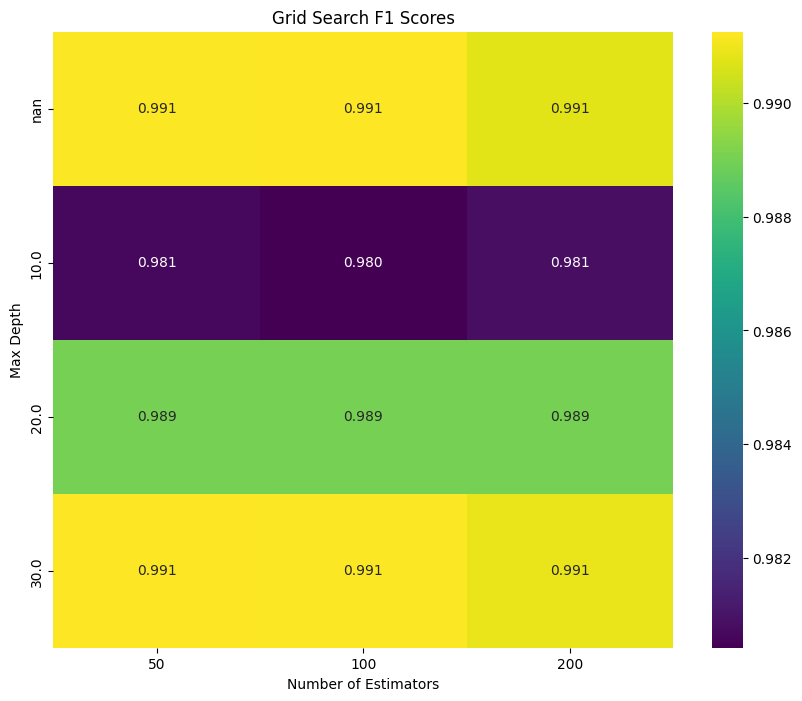

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Model: RandomForestClassifier(random_state=42)


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)

scores = results.pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

plt.figure(figsize=(10, 8))
sns.heatmap(scores, annot=True, fmt=".3f", cmap='viridis')
plt.title('Grid Search F1 Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')
print(f'Best Model: {best_model}')